# ARIMA
Yang Xi<br>
24 Aug, 2021

## Non-Seasonal ARIMA of Monthly Sales Data

<AxesSubplot:>

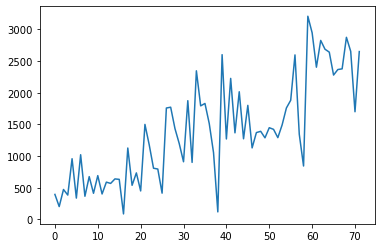

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

dfItemC = pd.read_csv('data/time_series_monthly_C.csv')
seSalesC = dfItemC['sales_qty']

seSalesC.plot()

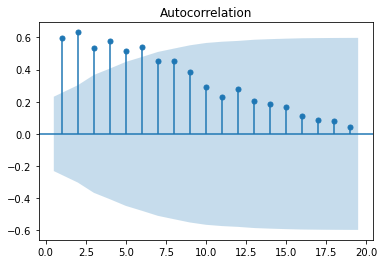

In [2]:
plotACF = plot_acf(seSalesC, fft=False, zero=False, alpha=0.05)

### Train/Test Sets and Performance Measures

In [3]:
seSalesC_train = seSalesC[dfItemC['first_date'] < '2013-01-01']
print(f"Train set contains {len(seSalesC_train)} rows.")
seSalesC_test = seSalesC[dfItemC['first_date'] >= '2013-01-01']
print(f"Test set contains {len(seSalesC_test)} rows.")

nTrain = len(seSalesC_train)
h = 12 # forecast for 12-month

def rmse_e(e, digits=2):
    return np.round(np.sqrt(np.mean(e**2)), digits)
def rmse(pred, actual, digits=2):
    return rmse_e(pred - actual, digits)

def mase(pred, actual, digits=2):
    n = len(pred)
    return np.round(np.sum(np.abs(pred-actual))/np.sum(np.abs(np.diff(actual)))*(n-1)/n, digits)

def CheckResiduals(res):
    plotACF = plot_acf(res, fft=False, zero=False, alpha=0.05)
    dfBox = acorr_ljungbox(res, lags=[len(res)-1], return_df=True)
    return plotACF, dfBox


Train set contains 60 rows.
Test set contains 12 rows.


### Non-Seasonal ARIMA

In [4]:
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(1)
fitARIMA = ARIMA(seSalesC_train, order=(4,1,1)).fit()
fitARIMA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              sales_qty   No. Observations:                   60
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -453.002
Date:                Wed, 25 Aug 2021   AIC                            918.004
Time:                        12:10:15   BIC                            930.470
Sample:                             0   HQIC                           922.870
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4422      0.241     -1.835      0.066      -0.914       0.030
ar.L2         -0.1506      0.249     -0.606      0.545      -0.638       0.337
ar.L3         -0.3061      0.255     -1.200      0.230      -0.806       0.194
ar.L4         -0.1392      0.224     -0.621      0.535      -0.579       0.300
ma.L1         -0.5673      0.280     -2.027      0.043      -1.116      -0.019
sigma2      2.679e+05    4.1e+04      6.527      0.000    1.87e+05    3.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 9.40
Prob(Q):                              0.57   Prob(JB):                         0.01
Heteroskedasticity (H):               5.25   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

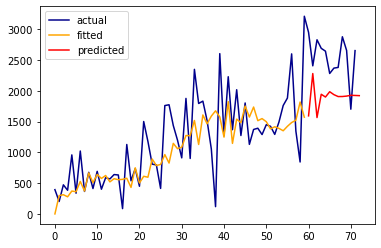

In [5]:
predARIMA = fitARIMA.predict(start=nTrain, end=nTrain+h)

line1, = plt.plot(seSalesC, color='darkblue')
line2, = plt.plot(fitARIMA.fittedvalues, color='orange')
line3, = plt.plot(predARIMA, color='red')
plt.legend([line1, line2, line3], ['actual', 'fitted', 'predicted'])

lb_stat      17.739430
lb_pvalue     0.948575
dtype: float64

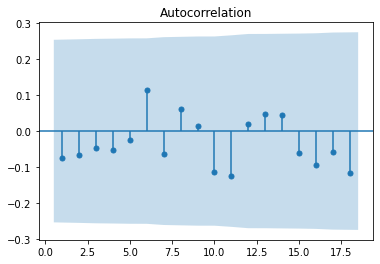

In [6]:
plotACF, dfBox = CheckResiduals(fitARIMA.resid)
dfBox

In [7]:
maseARIMA = mase(predARIMA, seSalesC_test)
rmseARIMA = rmse(predARIMA, seSalesC_test)
print(f"Non-seasonal ARIMA model: MASE = {maseARIMA}, RMSE = {rmseARIMA}.")

Non-seasonal ARIMA model: MASE = 1.76, RMSE = 770.67.


## Seasonal ARIMA of Daily Sales Data

<AxesSubplot:>

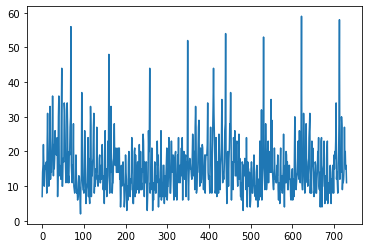

In [8]:
dfItemB = pd.read_csv('data/time_series_daily_B.csv')
seSalesB = dfItemB['sales_qty']

seSalesB.plot()

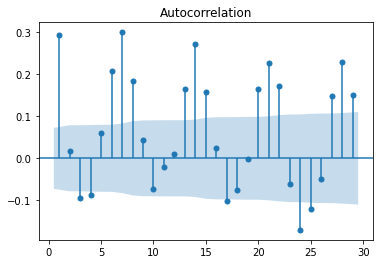

In [9]:
plotACF = plot_acf(seSalesB, fft=False, zero=False, alpha=0.05)

In [10]:
seSalesB_train = seSalesB[dfItemB['date'] < '2016-04-01']
print(f"Train set contains {len(seSalesB_train)} rows.")
seSalesB_test = seSalesB[dfItemB['date'] >= '2016-04-01']
print(f"Test set contains {len(seSalesB_test)} rows.")

nTrain = len(seSalesB_train)
h = 91 # forecast for 1-quarter

Train set contains 640 rows.
Test set contains 91 rows.


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

np.random.seed(1)
fitSARIMA = SARIMAX(seSalesB_train, order=(1,0,0), seasonal_order=(0,0,1,91), trend='c').fit()
fitSARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            sales_qty   No. Observations:                  640
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 91)   Log Likelihood               -2154.652
Date:                              Wed, 25 Aug 2021   AIC                           4317.304
Time:                                      12:11:04   BIC                           4335.150
Sample:                                           0   HQIC                          4324.231
                                              - 640                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.9814      0.763     14.389      0.000       9.486      12.477
ar.L1          0.2955      0.032      9.102      0.000       0.232       0.359
ma.S.L91       0.3339      0.034      9.961      0.000       0.268       0.400
sigma2        48.3497      2.320     20.837      0.000      43.802      52.898
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               307.44
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             1.09
Prob(H) (two-sided):                  0.91   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

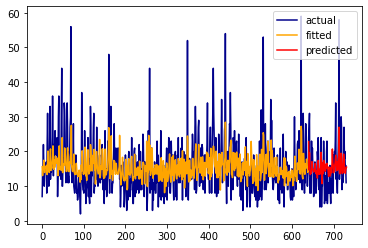

In [12]:
predSARIMA = fitSARIMA.predict(start=nTrain, end=nTrain+h)

line1, = plt.plot(seSalesB, color='darkblue')
line2, = plt.plot(fitSARIMA.fittedvalues, color='orange')
line3, = plt.plot(predSARIMA, color='red')
plt.legend([line1, line2, line3], ['actual', 'fitted', 'predicted'])

lb_stat      993.362852
lb_pvalue      0.004344
dtype: float64

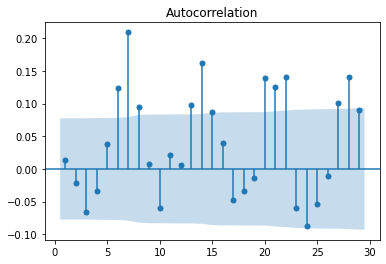

In [13]:
plotACF, dfBox = CheckResiduals(fitSARIMA.resid)
dfBox

In [14]:
maseSARIMA = mase(predSARIMA, seSalesB_test)
rmseSARIMA = rmse(predSARIMA, seSalesB_test)
print(f"Holt-Winter's model: MASE = {maseSARIMA}, RMSE = {rmseSARIMA}.")

Holt-Winter's model: MASE = 0.78, RMSE = 6.63.
